In [15]:
from collections import defaultdict
from random import uniform
from math import sqrt



def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in xrange(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.itervalues():
        centers.append(point_avg(points))

    return centers









In [20]:
from scipy.spatial import distance
import random



def distance(point, clusters):
    """
        distance between a point and a set of clusters
    """
    distances=[]
    for i in range(len(clusters)):
        distances.append(distance.euclidean(point, clusters[i]))
    return distances





def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    Generate `k` random intial clusters
    Return an array of the random points
    """
    centers=[]
    Y=list(range(len(data_set)))
    
    random.sample(Y, k)
    for i in range(k):
        centers.append(data_set[i])

    return centers



def assign_points(dataset, centers):
    """
    Given a data set and a list of cluster assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    """
    assignments = []
    for point in dataset:
        distances = distance(point,centers)  
        min_val = min(distances)
        index= distances.index(min_value)
        assignments.append(index)
    return assignments



def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    
    """
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return zip(assignments, dataset)"""

[1 2]


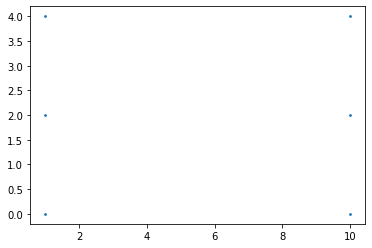

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
tmp=generate_k(X,2)
plt.scatter(X[:,0],X[:,1],s=3)
#Y=list(range(len(X)))
#print(Y)
#print(random.sample(Y, 2))
#print(tmp)

In [3]:
"""k=k_means(X,2)
print(k)
plt.scatter(X[:,0],X[:,1],s=3)
plt.scatter(k[:,0],k[:,1],s=3)"""

[2, 6, 8, 4]


In [18]:

a = (1, 2, 3)
b = (4, 5, 6)


In [19]:
print(dst)

5.196152422706632


In [4]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

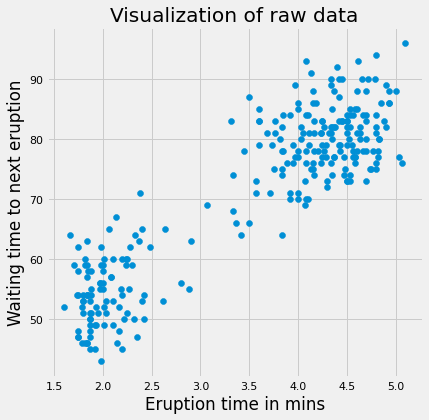

In [5]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('./data/old_faithful.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

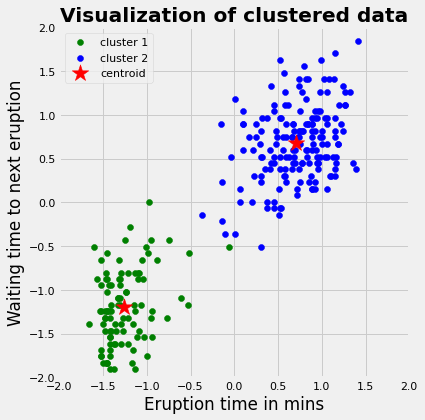

In [6]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');